In [63]:
import random
import itertools

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix
import torch
import torch.nn as nn
import torch.utils.data as D
import torch.nn.functional as F

from torchvision import transforms, models

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

torch.cuda.empty_cache()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/colorectal-histology-mnist/hmnist_28_28_RGB.csv
/kaggle/input/colorectal-histology-mnist/hmnist_64_64_L.csv
/kaggle/input/colorectal-histology-mnist/hmnist_8_8_L.csv
/kaggle/input/colorectal-histology-mnist/hmnist_8_8_RGB.csv
/kaggle/input/colorectal-histology-mnist/hmnist_28_28_L.csv
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_larger_images_10/Kather_texture_2016_larger_images_10/CRC-Prim-HE-05_APPLICATION.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_larger_images_10/Kather_texture_2016_larger_images_10/CRC-Prim-HE-04_APPLICATION.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_larger_images_10/Kather_texture_2016_larger_images_10/CRC-Prim-HE-10_APPLICATION.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_larger_images_10/Kather_texture_2016_larger_images_10/CRC-Prim-HE-06_APPLICATION.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_larger_images_10/Kather_texture_2016_larger_images_10/C

/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/04_LYMPHO/7BD2_CRC-Prim-HE-05_004.tif_Row_1_Col_901.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/04_LYMPHO/AF1F_CRC-Prim-HE-01_006.tif_Row_1_Col_451.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/04_LYMPHO/B496_CRC-Prim-HE-05_023.tif_Row_151_Col_1.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/04_LYMPHO/2635_CRC-Prim-HE-01_029.tif_Row_1_Col_301.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/04_LYMPHO/7EBC_CRC-Prim-HE-05_003.tif_Row_451_Col_451.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/04_LYMPHO/14653_CRC-Prim-HE-

/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/06_MUCOSA/1278F_CRC-Prim-HE-03_006.tif_Row_1201_Col_1201.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/06_MUCOSA/15EE6_CRC-Prim-HE-09_001.tif_Row_1_Col_151.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/06_MUCOSA/10978_CRC-Prim-HE-05_001.tif_Row_1_Col_151.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/06_MUCOSA/2742_CRC-Prim-HE-09_001.tif_Row_601_Col_1.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/06_MUCOSA/18A3_CRC-Prim-HE-05_030.tif_Row_151_Col_751.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/06_MUCOSA/260E_CRC-Pr

/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/07_ADIPOSE/10006_CRC-Prim-HE-03_012.tif_Row_601_Col_2251.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/07_ADIPOSE/11E96_CRC-Prim-HE-05_032.tif_Row_1501_Col_1201.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/07_ADIPOSE/16F5E_CRC-Prim-HE-03_012.tif_Row_751_Col_2851.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/07_ADIPOSE/16DC3_CRC-Prim-HE-07.tif_Row_151_Col_2101.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/07_ADIPOSE/11808_CRC-Prim-HE-07.tif_Row_1051_Col_4051.tif
/kaggle/input/colorectal-histology-mnist/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/07_ADIPOSE/

/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/08_EMPTY/14EA7_CRC-Prim-HE-06_005.tif_Row_4051_Col_7951.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/08_EMPTY/12204_CRC-Prim-HE-06_005.tif_Row_1351_Col_751.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/08_EMPTY/148C9_CRC-Prim-HE-06_005.tif_Row_3901_Col_7201.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/08_EMPTY/13F2B_CRC-Prim-HE-06_005.tif_Row_4201_Col_1501.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/08_EMPTY/10D31_CRC-Prim-HE-06_005.tif_Row_3301_Col_5701.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/08_EMPTY/11

/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/02_STROMA/126C4_CRC-Prim-HE-05_009b.tif_Row_601_Col_1.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/02_STROMA/12CA1_CRC-Prim-HE-03_004.tif_Row_451_Col_451.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/02_STROMA/1079B_CRC-Prim-HE-04_013.tif_Row_1051_Col_301.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/02_STROMA/13717_CRC-Prim-HE-03_008.tif_Row_1501_Col_1351.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/02_STROMA/10310_CRC-Prim-HE-04.tif_Row_1951_Col_151.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/02_STROMA/1023E_

/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/05_DEBRIS/85C2_CRC-Prim-HE-03_010.tif_Row_751_Col_901.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/05_DEBRIS/15D11_CRC-Prim-HE-07_002.tif_Row_1_Col_151.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/05_DEBRIS/4721_CRC-Prim-HE-03_010.tif_Row_151_Col_1501.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/05_DEBRIS/118D7_CRC-Prim-HE-07_002.tif_Row_451_Col_1201.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/05_DEBRIS/126F4_CRC-Prim-HE-04_010.tif_Row_1_Col_1.tif
/kaggle/input/colorectal-histology-mnist/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/05_DEBRIS/11D3E_CRC-P

# Helpers

In [62]:
def display_pil_images(
    images, 
    labels,
    columns=5, width=20, height=8, max_images=15, 
    label_wrap_length=50, label_font_size=8):

    if not images:
        print("No images to display.")
        return 

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))
        
    for i, image in enumerate(images):

        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)

        plt.title(labels[i], fontsize=label_font_size); 
        
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)
    
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
DATA_DIR = '/kaggle/input/colorectal-histology-mnist/'
SMALL_IMG_DATA_DIR = os.path.join(DATA_DIR, 'kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000')
LARGE_IMG_DATA_DIR = os.path.join(DATA_DIR, 'kather_texture_2016_larger_images_10/Kather_texture_2016_larger_images_10')

# for inceptionv3, xception 229, other models 224
IMAGE_SIZE = 224
SEED = 2000
BATCH_SIZE = 64
NUM_EPOCHS = 15

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Data exploration

In [4]:
classes = os.listdir(SMALL_IMG_DATA_DIR)
classes

['03_COMPLEX',
 '08_EMPTY',
 '04_LYMPHO',
 '01_TUMOR',
 '02_STROMA',
 '06_MUCOSA',
 '05_DEBRIS',
 '07_ADIPOSE']

In [5]:
os.listdir(LARGE_IMG_DATA_DIR)

['CRC-Prim-HE-05_APPLICATION.tif',
 'CRC-Prim-HE-04_APPLICATION.tif',
 'CRC-Prim-HE-10_APPLICATION.tif',
 'CRC-Prim-HE-06_APPLICATION.tif',
 'CRC-Prim-HE-03_APPLICATION.tif',
 'CRC-Prim-HE-01_APPLICATION.tif',
 'CRC-Prim-HE-08_APPLICATION.tif',
 'CRC-Prim-HE-02-APPLICATION.tif',
 'CRC-Prim-HE-07_APPLICATION.tif',
 'CRC-Prim-HE-09_APPLICATION.tif']

In [6]:
samples_to_view = []
for label in classes:
    num_samples = len(os.listdir(os.path.join(SMALL_IMG_DATA_DIR,label)))
    print(label + '\t' + str(num_samples))
    samples_to_view.append(random.choice(np.arange(num_samples)))

03_COMPLEX	625
08_EMPTY	625
04_LYMPHO	625
01_TUMOR	625
02_STROMA	625
06_MUCOSA	625
05_DEBRIS	625
07_ADIPOSE	625


In [7]:
imgs = []
for idx, label in enumerate(classes):
    show_idx = samples_to_view[idx]
    file_name = os.listdir(os.path.join(SMALL_IMG_DATA_DIR,label))[show_idx] 
    print(file_name)
    imgs.append(Image.open(os.path.join(SMALL_IMG_DATA_DIR,label,file_name)))

5C8E_CRC-Prim-HE-08_005.tif_Row_901_Col_1.tif
1429C_CRC-Prim-HE-06_005.tif_Row_5401_Col_6451.tif
6408_CRC-Prim-HE-05_004.tif_Row_451_Col_1.tif
154F0_CRC-Prim-HE-09_024.tif_Row_151_Col_151.tif
13F70_CRC-Prim-HE-07_014.tif_Row_751_Col_1351.tif
1754A_CRC-Prim-HE-06_001.tif_Row_601_Col_751.tif
1688C_CRC-Prim-HE-08_023.tif_Row_451_Col_151.tif
16CE8_CRC-Prim-HE-03_012.tif_Row_1801_Col_901.tif


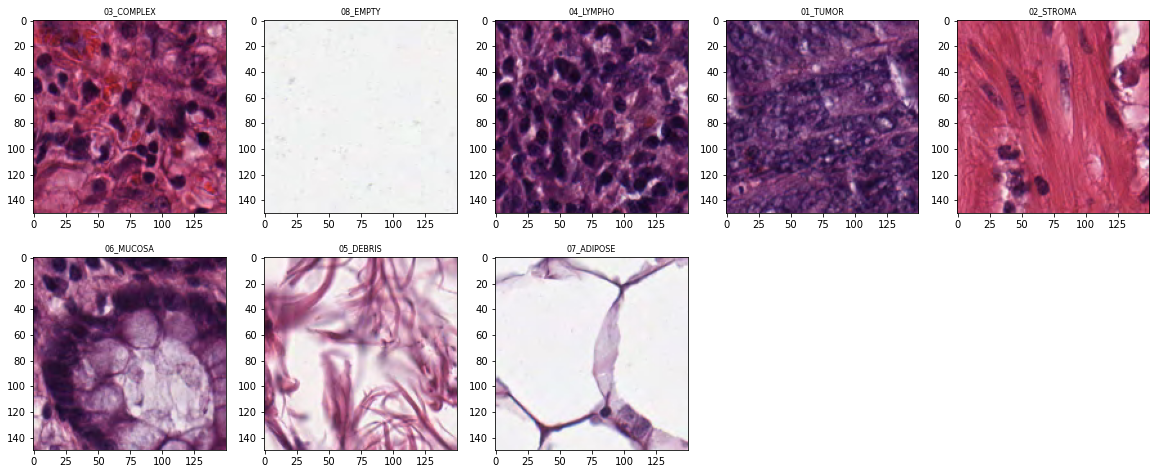

In [8]:
display_pil_images(imgs, classes)

In [9]:
imgs_paths, labels = [], []
for label in classes:
    file_names = os.listdir(os.path.join(SMALL_IMG_DATA_DIR,label))
    for file_name in file_names:
        imgs_paths.append(os.path.join(SMALL_IMG_DATA_DIR,label,file_name))
        labels.append(label)

In [10]:
df = pd.DataFrame(data={'img_path': imgs_paths, 'label': labels})
df.head()

img_path       label
0  /kaggle/input/colorectal-histology-mnist/kathe...  03_COMPLEX
1  /kaggle/input/colorectal-histology-mnist/kathe...  03_COMPLEX
2  /kaggle/input/colorectal-histology-mnist/kathe...  03_COMPLEX
3  /kaggle/input/colorectal-histology-mnist/kathe...  03_COMPLEX
4  /kaggle/input/colorectal-histology-mnist/kathe...  03_COMPLEX

In [11]:
label_num = {}
for idx, item in enumerate(np.unique(df.label)):
    label_num[item] = idx 

In [12]:
df['label_num'] = df['label'].apply(lambda x: label_num[x])

In [13]:
class HistologyMnistDS(D.Dataset):
    def __init__(self, df, transforms, mode='train'):

        self.records = df.to_records(index=False)
        self.transforms = transforms
        self.mode = mode
        self.len = df.shape[0]
    
    @staticmethod
    def _load_image_pil(path):
        return Image.open(path)
        
    def __getitem__(self, index):
        path = self.records[index].img_path

        img = self._load_image_pil(path)
        
        if self.transforms:
            img = self.transforms(img)

        if self.mode in ['train', 'val', 'test']:
            return img, torch.from_numpy(np.array(self.records[index].label_num))
        else:
            return img

    def __len__(self):
        return self.len

In [14]:
train_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [15]:
train_df, tmp_df = train_test_split(df,
                                      test_size=0.2,  
                                      random_state=SEED,
                                      stratify=df['label'])

valid_df, test_df = train_test_split(tmp_df,
                                      test_size=0.8,  
                                      random_state=SEED,
                                      stratify=tmp_df['label'])

In [16]:
print("Train DF shape:", train_df.shape)
print("Valid DF shape:", valid_df.shape)
print("Test DF shape:", test_df.shape)

Train DF shape: (4000, 3)
Valid DF shape: (200, 3)
Test DF shape: (800, 3)


In [17]:
ds_train = HistologyMnistDS(train_df, train_transforms)
ds_val = HistologyMnistDS(valid_df, val_transforms, mode='val')
ds_test = HistologyMnistDS(test_df, val_transforms, mode='test')

In [18]:
train_loader = D.DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
val_loader = D.DataLoader(ds_val, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
test_loader = D.DataLoader(ds_test, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

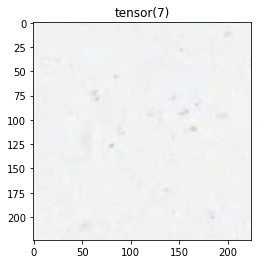

In [19]:
X_batch, y_batch = next(iter(train_loader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean)
plt.title(y_batch[0]);

In [40]:
import copy 

checkpoints_dir = '/kaggle/working/'

history_train_loss, history_val_loss = [], []
    
def train_model(model, loss, optimizer, scheduler, num_epochs):
    best_model_wts = copy.deepcopy(model.state_dict())
       
    best_loss = 10e10
    best_acc_score = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_loader
                scheduler.step()
                model.train()
            else:
                dataloader = val_loader
                model.eval()

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)
            
            if phase == 'train':
                history_train_loss.append(epoch_loss)
            else:
                history_val_loss.append(epoch_loss)
            
            if phase == 'val':
                def save_checkpoint(name):
                    checkpoint = {
                        'state_dict': best_model_wts
                    }

                    model_file_name = name + '.pth.tar'

                    model_file = checkpoints_dir + model_file_name

                    if not os.path.exists(checkpoints_dir):
                        os.mkdir(checkpoints_dir)

                    # saving best weights of model
                    torch.save(checkpoint, model_file)

                if epoch_loss < best_loss:
                    best_loss = epoch_loss
                    best_model_wts = copy.deepcopy(model.state_dict())
                    print("Saving model for best loss")
                    save_checkpoint('best_model')
                
                if epoch_acc > best_acc_score:
                    best_acc_score = epoch_acc
                    
                print('Best_loss: {:.4f}'.format(best_loss))
                print('Best_acc_score: {:.4f}'.format(best_acc_score))

    return model

In [41]:
model = models.resnet50(pretrained=False)

# Disable grad for all conv layers
# for param in model.parameters():
#     param.requires_grad = False

model.fc = torch.nn.Linear(model.fc.in_features, len(classes))
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)
# optimizer = torch.optim.SGD(model.parameters(), lr=1.0e-3, momentum=0.9, weight_decay=1e-3, nesterov=True)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [42]:
train_model(model, loss, optimizer, scheduler, num_epochs=NUM_EPOCHS);

Epoch 0/9:


100%|██████████| 63/63 [00:25<00:00,  2.46it/s]

train Loss: 1.0313 Acc: 0.6414



100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

val Loss: 0.7102 Acc: 0.7578


Saving model for best loss
Best_loss: 0.7102
Best_acc_score: 0.7578
Epoch 1/9:


100%|██████████| 63/63 [00:26<00:00,  2.42it/s]

train Loss: 0.6983 Acc: 0.7587



100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

val Loss: 4.5117 Acc: 0.6250
Best_loss: 0.7102
Best_acc_score: 0.7578
Epoch 2/9:



100%|██████████| 63/63 [00:25<00:00,  2.45it/s]

train Loss: 0.6180 Acc: 0.7862



100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

val Loss: 0.4103 Acc: 0.8477


Saving model for best loss
Best_loss: 0.4103
Best_acc_score: 0.8477
Epoch 3/9:


100%|██████████| 63/63 [00:25<00:00,  2.43it/s]

train Loss: 0.5134 Acc: 0.8209



100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

val Loss: 0.3510 Acc: 0.8516


Saving model for best loss
Best_loss: 0.3510
Best_acc_score: 0.8516
Epoch 4/9:


100%|██████████| 63/63 [00:25<00:00,  2.47it/s]

train Loss: 0.4767 Acc: 0.8182



100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

val Loss: 2.5895 Acc: 0.6641
Best_loss: 0.3510
Best_acc_score: 0.8516
Epoch 5/9:



100%|██████████| 63/63 [00:25<00:00,  2.46it/s]

train Loss: 0.4765 Acc: 0.8259



100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

val Loss: 0.4351 Acc: 0.8398
Best_loss: 0.3510
Best_acc_score: 0.8516
Epoch 6/9:



100%|██████████| 63/63 [00:26<00:00,  2.42it/s]

train Loss: 0.3701 Acc: 0.8676



100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

val Loss: 0.1979 Acc: 0.9414


Saving model for best loss
Best_loss: 0.1979
Best_acc_score: 0.9414
Epoch 7/9:


100%|██████████| 63/63 [00:25<00:00,  2.45it/s]

train Loss: 0.3140 Acc: 0.8886



100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

val Loss: 0.1852 Acc: 0.9414


Saving model for best loss
Best_loss: 0.1852
Best_acc_score: 0.9414
Epoch 8/9:


100%|██████████| 63/63 [00:26<00:00,  2.42it/s]

train Loss: 0.2892 Acc: 0.9000



100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

val Loss: 0.1873 Acc: 0.9375
Best_loss: 0.1852
Best_acc_score: 0.9414
Epoch 9/9:



100%|██████████| 63/63 [00:25<00:00,  2.45it/s]

train Loss: 0.2876 Acc: 0.9015



100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

val Loss: 0.1765 Acc: 0.9414


Saving model for best loss
Best_loss: 0.1765
Best_acc_score: 0.9414


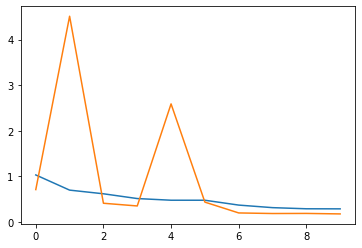

In [43]:
x = np.arange(NUM_EPOCHS)
plt.plot(x, history_train_loss)
plt.plot(x, history_val_loss)

In [44]:
filename = "best_model.pth.tar"

model.load_state_dict(torch.load(os.path.join(checkpoints_dir, filename))['state_dict'])
    
model.eval()

y_preds = []
for inputs, labels in tqdm(test_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
    y_preds.append(preds.argmax(dim=1).data.cpu().numpy())
    
y_preds = np.concatenate(y_preds)

100%|██████████| 13/13 [00:04<00:00,  3.17it/s]


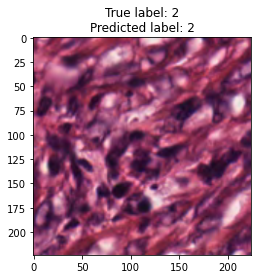

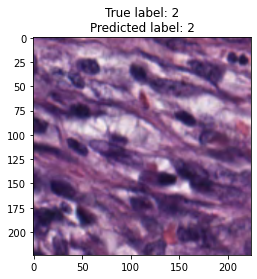

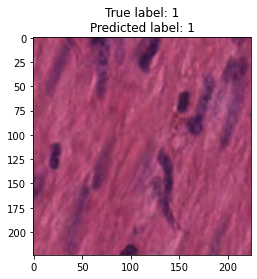

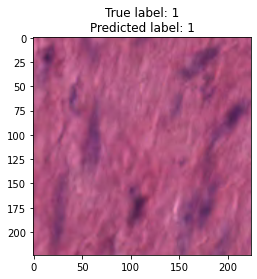

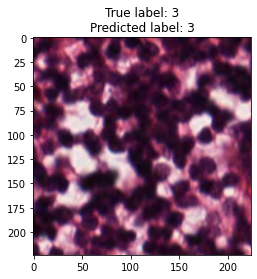

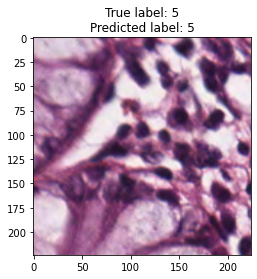

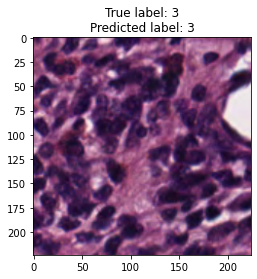

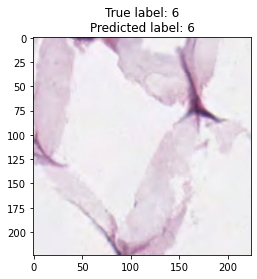

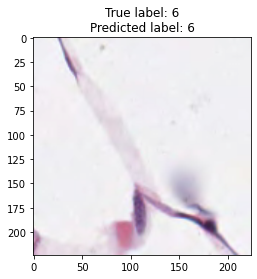

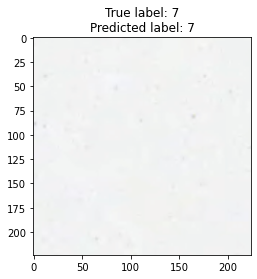

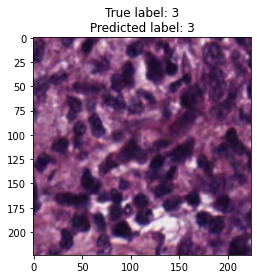

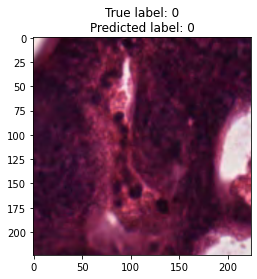

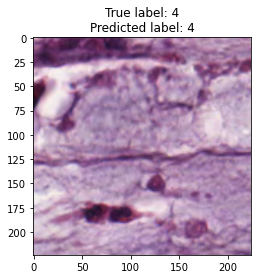

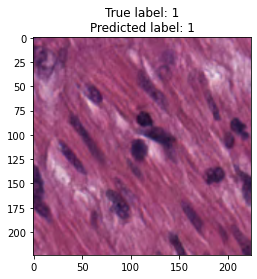

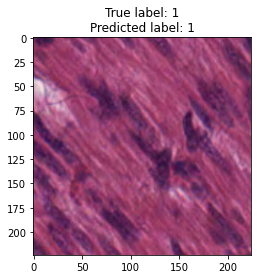

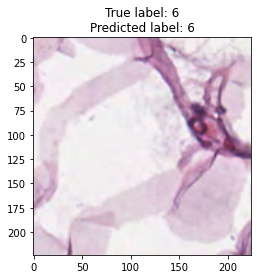

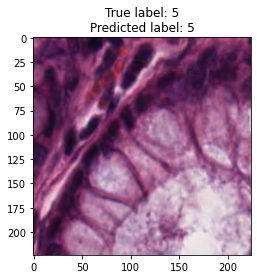

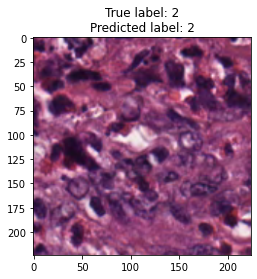

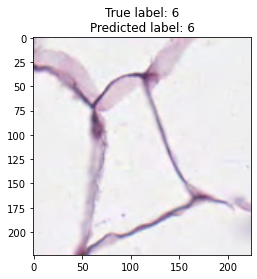

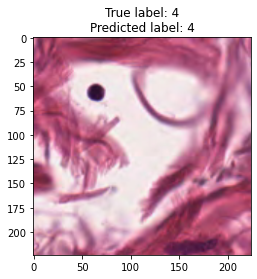

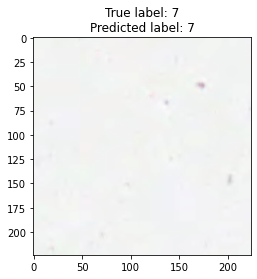

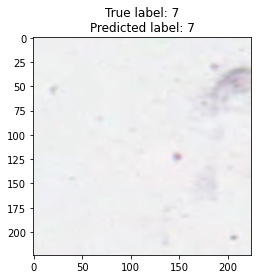

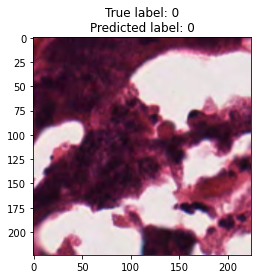

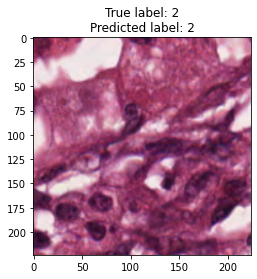

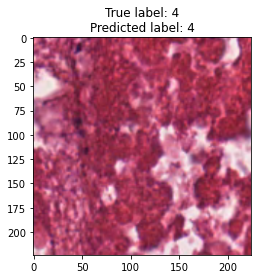

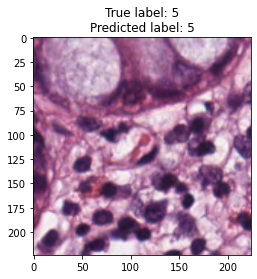

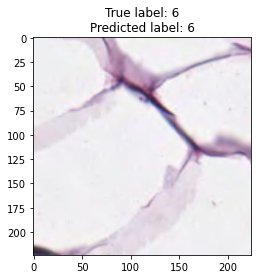

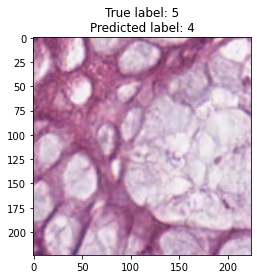

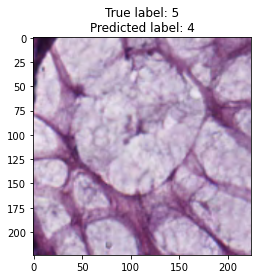

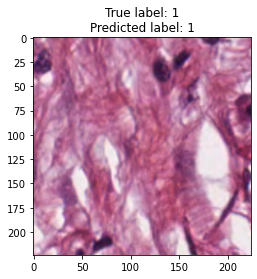

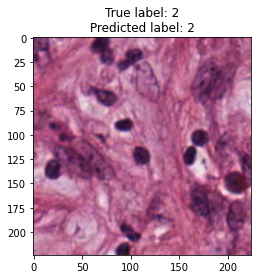

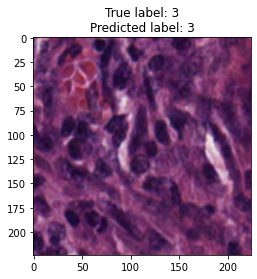

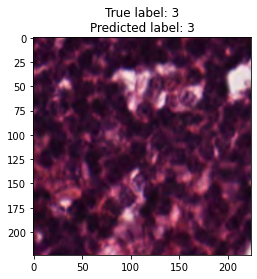

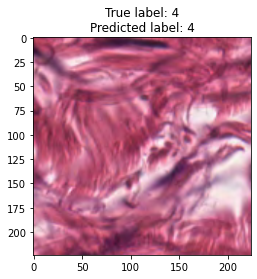

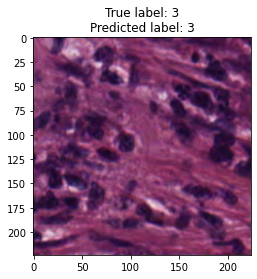

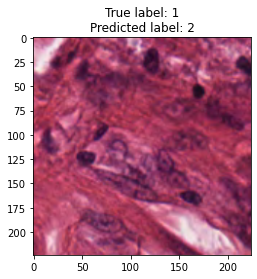

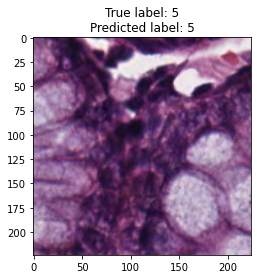

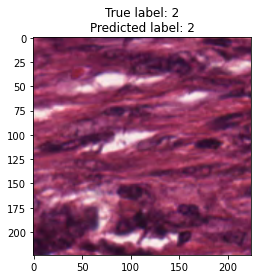

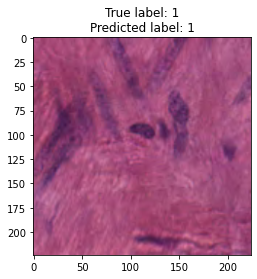

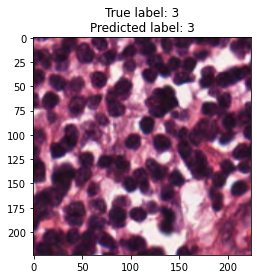

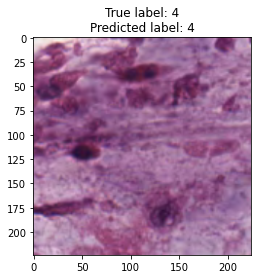

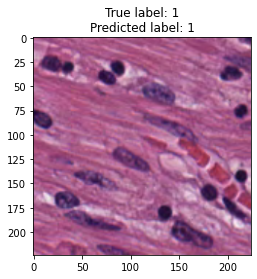

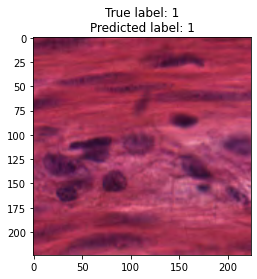

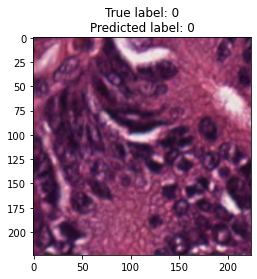

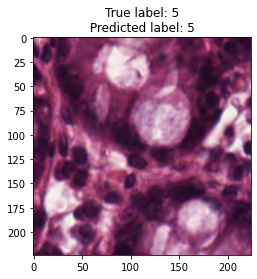

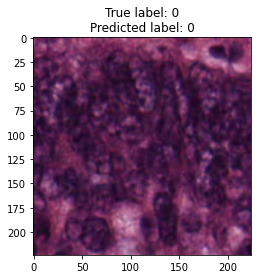

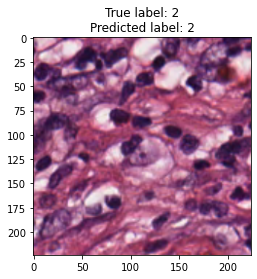

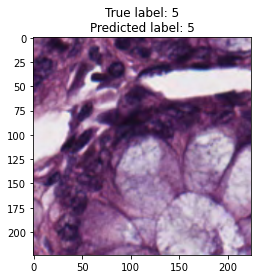

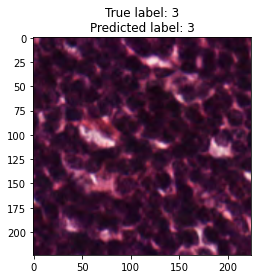

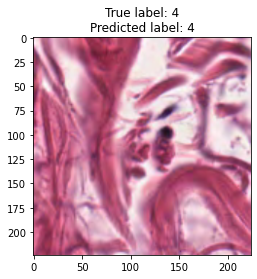

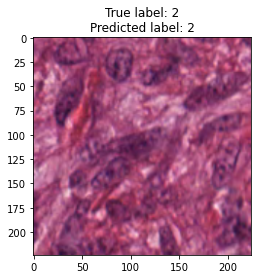

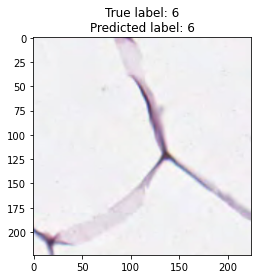

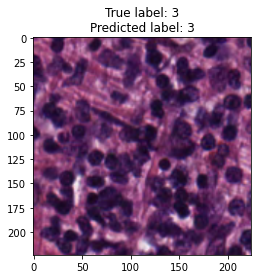

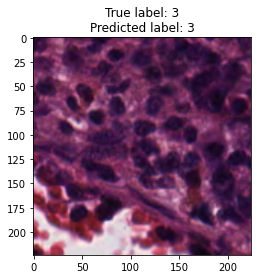

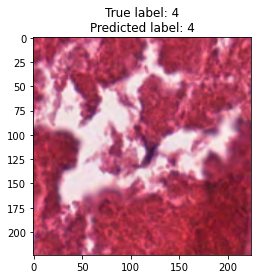

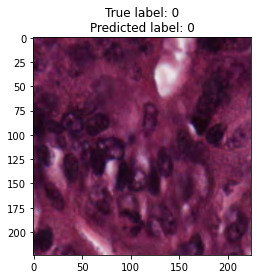

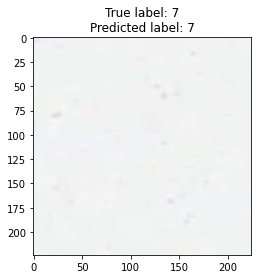

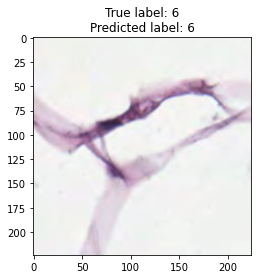

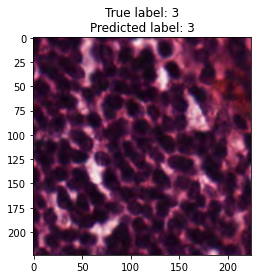

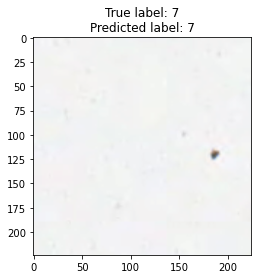

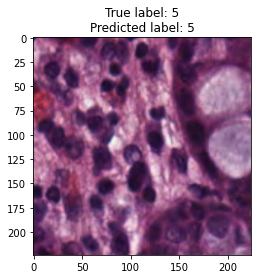

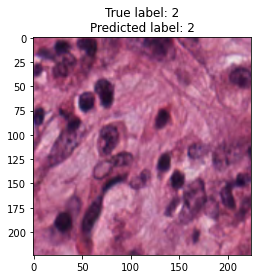

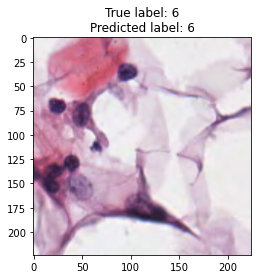

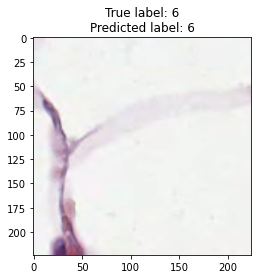

In [45]:
inputs, labels = next(iter(test_loader))

for img, label, pred in zip(inputs, labels, y_preds):
    title = f"True label: {label}\nPredicted label: {pred}"
    show_input(img, title=title)

In [55]:
cm = confusion_matrix(test_df.label_num.values, y_preds)

Confusion matrix, without normalization
[[98  0  1  0  0  1  0  0]
 [ 0 88  5  0  7  0  0  0]
 [ 2 11 83  3  0  1  0  0]
 [ 0  0  5 95  0  0  0  0]
 [ 0  4  2  0 89  1  4  0]
 [ 1  0  2  4  2 91  0  0]
 [ 0  0  0  0  1  0 96  3]
 [ 0  0  0  0  0  0  1 99]]


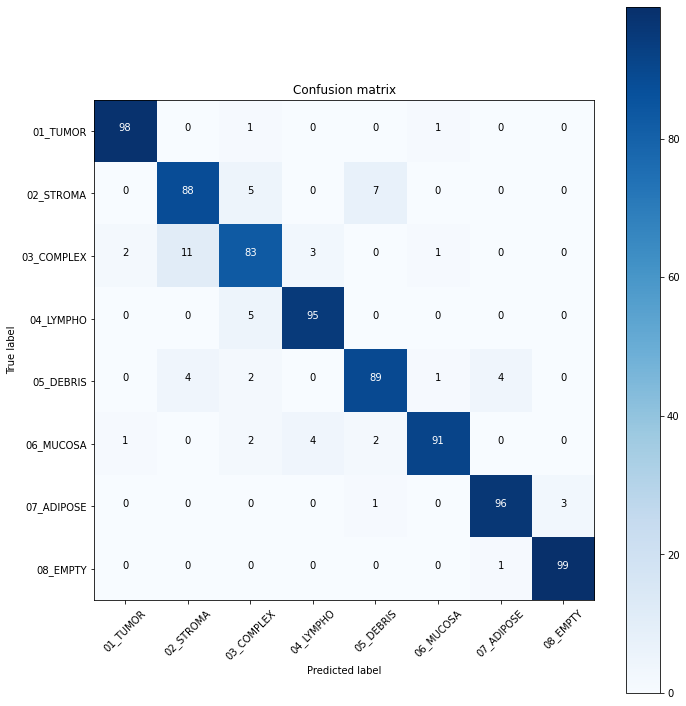

In [61]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, label_num)

In [76]:
print(classification_report(test_df.label_num.values, 
                            y_preds, 
                            target_names=list(label_num.keys())))

              precision    recall  f1-score   support

    01_TUMOR       0.97      0.98      0.98       100
   02_STROMA       0.85      0.88      0.87       100
  03_COMPLEX       0.85      0.83      0.84       100
   04_LYMPHO       0.93      0.95      0.94       100
   05_DEBRIS       0.90      0.89      0.89       100
   06_MUCOSA       0.97      0.91      0.94       100
  07_ADIPOSE       0.95      0.96      0.96       100
    08_EMPTY       0.97      0.99      0.98       100

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



In [78]:
colors = itertools.cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(classes, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

TypeError: 'list' object cannot be interpreted as an integer